# German Traffic Signs with Keras
This project is a redo of the [German traffic signs project I implemented with TensorFlow](https://github.com/AryanJ-NYC/CarND-Traffic-Sign-Classifier-Project).  Most cells will be similar or, in some instances, exactly the same.  The major exception will be the neural network architecture which will be written using Keras.

## Load Data

In [1]:
import pickle

traffic_signs_data_dir = 'traffic-signs-data'
training_data_filename = traffic_signs_data_dir + '/train.p'
validation_data_filename = traffic_signs_data_dir + '/valid.p'
test_data_filename = traffic_signs_data_dir + '/test.p'

with open(training_data_filename, mode='rb') as train_file, \
open(validation_data_filename, mode='rb') as valid_file, \
open(test_data_filename, mode='rb')as test_file:
    train_data = pickle.load(train_file)
    valid_data = pickle.load(valid_file)
    test_data = pickle.load(test_file)

X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

## Describe Data

In [12]:
# number of training examples
X_train_shape = X_train.shape
print('Number of training examples:', X_train_shape[0])

# number of validation examples
print('Number of validation examples:', X_valid.shape[0])

# number of test examples
print('Number of test examples:', X_test.shape[0])

# number of unique classes
num_classes = max(y_train) + 1
print('Number of unique labels:', num_classes)

# shape of images
print('The images are of size {}'.format(X_train_shape[1:3]))

# number of channels
print('Each image has {} channels'.format(X_train_shape[3]))

Number of training examples: 34799
Number of validation examples: 4410
Number of test examples: 12630
Number of unique labels: 43
The images are of size (32, 32)
Each image has 3 channels


## Training Data Visualization

### Sign Frequency

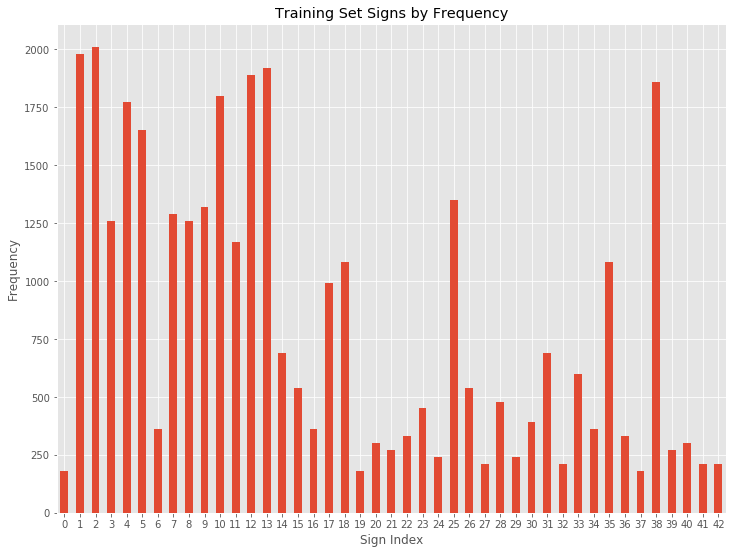

ClassId                                           SignName  Count
      0                               Speed limit (20km/h)    180
      1                               Speed limit (30km/h)   1980
      2                               Speed limit (50km/h)   2010
      3                               Speed limit (60km/h)   1260
      4                               Speed limit (70km/h)   1770
      5                               Speed limit (80km/h)   1650
      6                        End of speed limit (80km/h)    360
      7                              Speed limit (100km/h)   1290
      8                              Speed limit (120km/h)   1260
      9                                         No passing   1320
     10       No passing for vehicles over 3.5 metric tons   1800
     11              Right-of-way at the next intersection   1170
     12                                      Priority road   1890
     13                                              Yield   1920
     14   

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

label_names = pd.read_csv(traffic_signs_data_dir + '/signnames.csv')

matplotlib.style.use('ggplot')

fig_size = (12, 9)
plt.rcParams['figure.figsize'] = fig_size
training_labels = pd.DataFrame({'label': y_train})
label_names['Count'] = training_labels['label'].value_counts().sort_index()
plot = label_names['Count'].plot(kind='bar', rot=0)
plot.set_title('Training Set Signs by Frequency')
plot.set_ylabel('Frequency')
plot.set_xlabel('Sign Index')
plt.show()

# print label map
print(label_names.to_string(index=False))
%matplotlib inline

### Sign Visualization

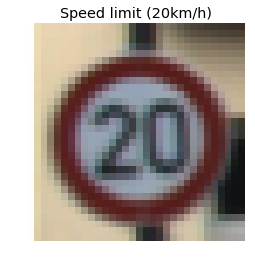

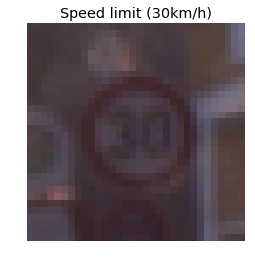

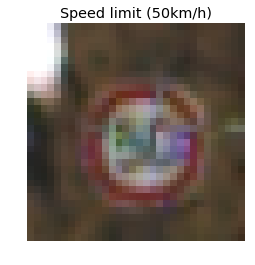

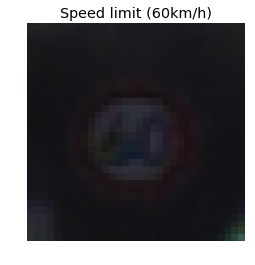

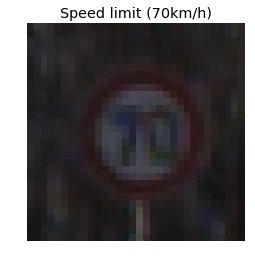

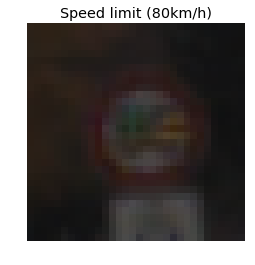

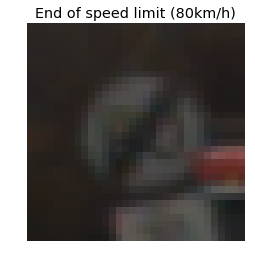

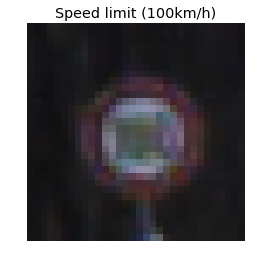

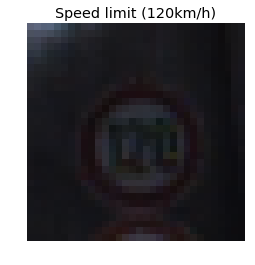

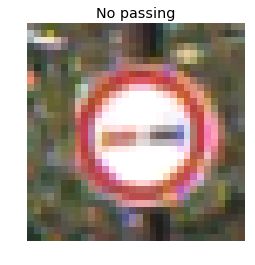

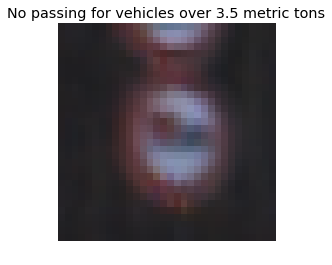

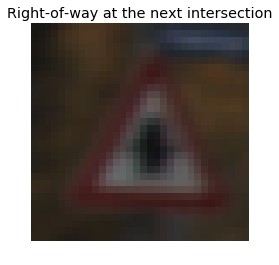

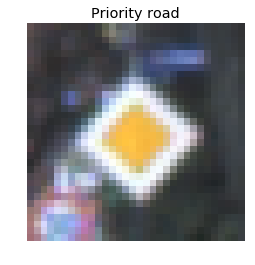

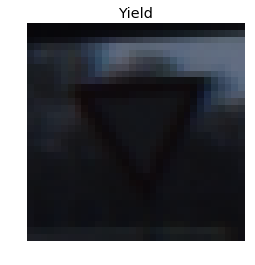

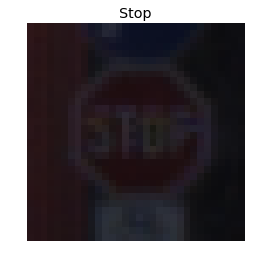

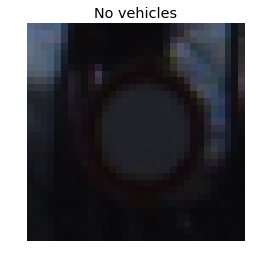

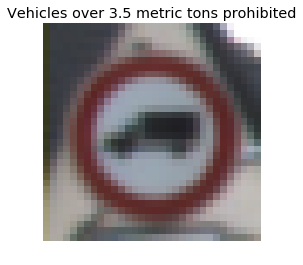

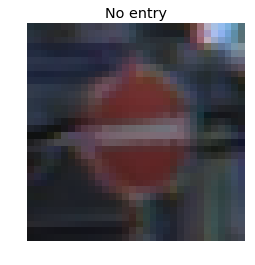

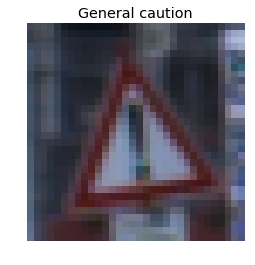

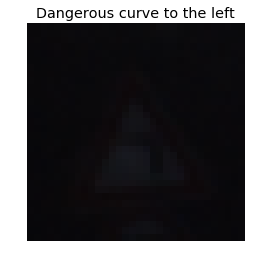

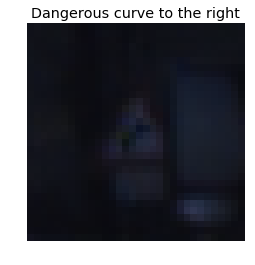

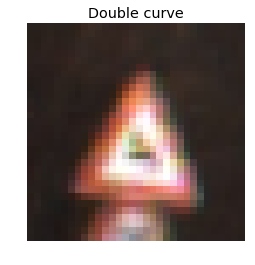

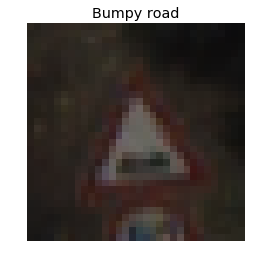

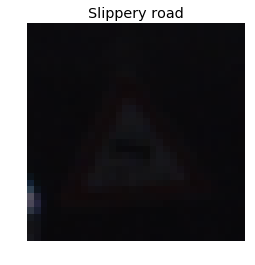

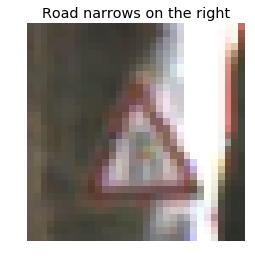

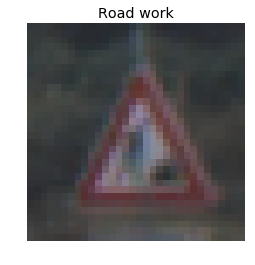

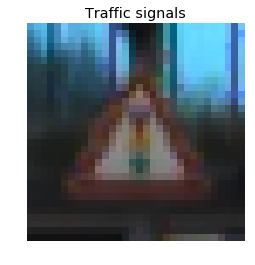

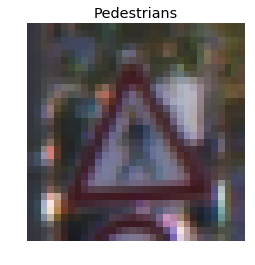

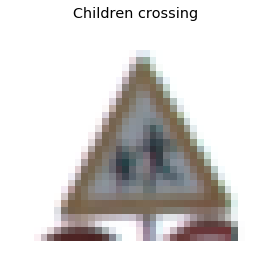

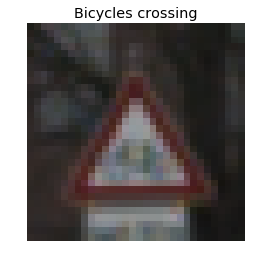

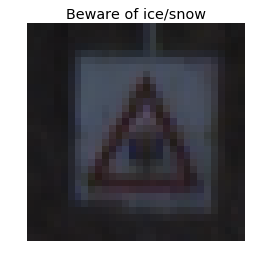

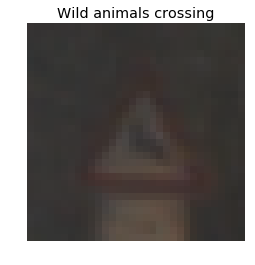

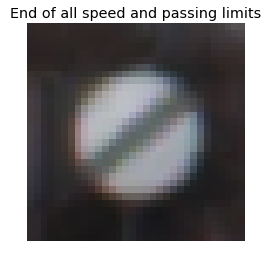

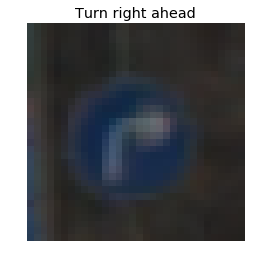

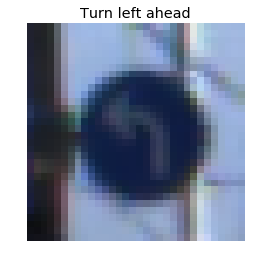

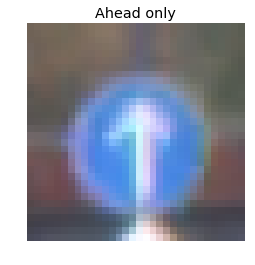

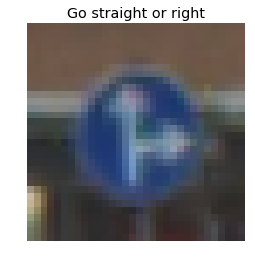

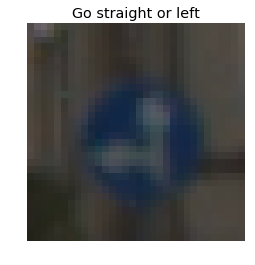

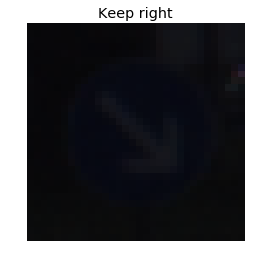

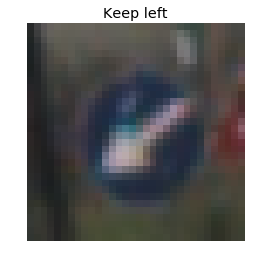

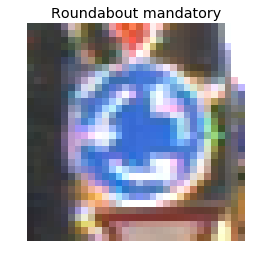

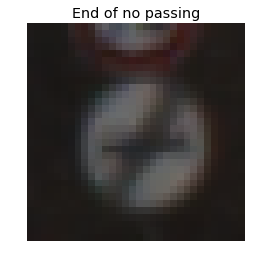

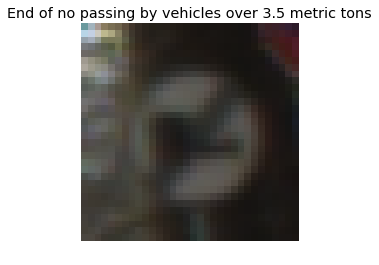

In [27]:
import numpy as np
import random

for class_num in range(num_classes):
    image_index = np.where(y_train == class_num)[0][0]
    image = X_train[image_index]
    image_title = label_names["SignName"][class_num]
    plt.imshow(image)
    plt.title(image_title)
    plt.axis('off')
    plt.show()